# Código inicial y paquetes

In [ ]:
install.packages("readr")
require(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: readr



In [ ]:
install.packages("ggplot2")
require(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2



In [ ]:
install.packages("DescTools")
library(DescTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Rcpp’, ‘Exact’, ‘gld’, ‘BH’




# Parte para copiar ruta

In [ ]:
 consumo<-read.csv("/content/consumo_cc.csv")
 head(consumo)

,id,educacion,sexo,edad,cervezas,hijos,cigarrillo
,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>
1,1,12,Masculino,18,3,0,0
2,2,12,Femenino,19,2,0,1
3,3,10,Masculino,20,5,0,1
4,4,11,Masculino,20,4,0,0
5,5,12,Femenino,20,3,1,0
6,6,12,Femenino,20,4,1,0


In [ ]:
consumo<-na.omit(consumo)
consumo$sexo=as.factor(consumo$sexo)
consumo$cervezas=as.integer(consumo$cervezas)
head(consumo)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,id,educacion,sexo,edad,cervezas,hijos,cigarrillo
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,1,12,Masculino,18,3,0,0
2,2,12,Femenino,19,2,0,1
3,3,10,Masculino,20,5,0,1
4,4,11,Masculino,20,4,0,0
5,5,12,Femenino,20,3,1,0
6,6,12,Femenino,20,4,1,0


# Respuestas

Para responder las preguntas hechas del estudio para determinar la incidencia de ciertos factores sociodemográficos sobre el consumo de cerveza y de cigarrillo en población de Cundinamarca de 1.151 personas seleccionadas aleatoriamente, es necesario ver qué tipos de datos tenemos:

- id no tiene relación ya que es el número de la encuesta, toca quitarla con -id
- Educación en años estudiados, escalar
- Sexo es una variable categórica de dos grupos Femenino o Masculino
- edad escalar
- Cerveza es escalar
- hijos escalar
- cigarrillo es binaria

1. ¿Cuáles son los factores que inciden en la explicación del consumo de
cerveza por parte de la población encuestada? ¿En qué porcentaje estos
factores explican la variabilidad del consumo de cerveza?

Ya que estamos hablando de un solo porcentaje para múltiples factores este se puede considerar un problema de regresión lineal múltiple, si desplegamos ese aparte en la parte inferior en cuanto al modelo 6 que incluye el número de cervezas explicadas en función de las variables sexo, educación, edad e hijos y luego la celda summary que nos da un resumen de este podemos notar algunas cosas:

-

```
Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.694254   0.335583  16.968   <2e-16 ***
sexoMasculino -0.185692   0.104726  -1.773   0.0765 .  
educacion     -0.201045   0.019776 -10.166   <2e-16 ***
edad          -0.006702   0.004233  -1.583   0.1137    
hijos          0.008952   0.044455   0.201   0.8404  
```

En cuanto a la primera parte de la pregunta: ¿Cuáles son los factores que inciden en la explicación del consumo de cerveza por parte de la población encuestada?, la única variable que se debe tener en cuenta ya que su p valor (denotado por Pr(>|t|)) es menor a nuestro margen de error por excelencia del 5%, y que además R nos ayuda distinguiéndola con tres estrellitas fuera del intercepto es la variable educación, esta es al parecer la única que incide en el consumo de cerveza por parte de la población encuestada.

- Adjusted R-squared:  0.08691

En cuanto a la segunda parte de la pregunta ¿En qué porcentaje estos
factores explican la variabilidad del consumo de cerveza?, el puntaje R cuadrado ajustado siendo un porcentaje de variabilidad es de 0.08691 que nos indica un 8.691% del consumo de cervezas explicada por el sexo de nacimiento, la educación, la edad y el número de hijos, lo cual lo hace un modelo malisisisisimo ya que solo explicando el 8.691% queda por fuera de la explicación el 91.309% del fenómeno.


2. ¿Es confiable realizar pronósticos o análisis estructurales con los factores
obtenidos en el modelo del punto anterior? Explique detalladamente su
respuesta

En resumen, no, para nada, si nos referimos al punto anterior como estaba, explicando el R cuadrado que explica el consumo de cervezas explicada por el sexo de nacimiento, la educación, la edad y el número de hijos solo para el 8.691% quedando en lo desconocido el 91.309% del fenómeno no es para nada confiable, hay prácticamente 9 de 10 cervezas que no han sido explicadas, puede ser por amor, por odio, porque a la población se le dió por romper botellas de cerveza, simplemente no lo sabríamos con tal modelo.

3. ¿Qué oportunidades de mejora y/o correctivos deben aplicarse para que se
pueda explicar el consumo de cerveza con mayor precisión y confiabilidad?

Hay varias alternativas, creo que se necesita agregar una cantidad más alta de factores lógicos para el consumo de bebidas alcohólicas como estrés, fiestas, número de asados asados a los que se asiste, si es costeño o no, si ve fútbol, si es alcohólico empedernido... pero es signo de que hay que mejorar la encuesta desde su mismo planteamiento, también podemos creer que simplemente omitir variables y dejárselo todo al nivel educativo haciendo regresión lineal simple podría ser un opción pero debido a mi experimento de pasar el número de cervezas en función de la educación en el apartado de Regresión lineal no lo considero una buena opción porque sucede casi lo mismo, es decir Homero Simpson fue astronauta, físico nuclear y aún así un ebrio orgulloso

4. ¿Cuál es la variable que tiene mayor incidencia en el consumo de cigarrillo?
¿Cómo varía la probabilidad de consumir cigarrillo ante la presencia de los
factores más determinantes?

De las que aportan al parecer es la variante Dummy binaria de sexo (masculino/femenino) que da un estimado de 0.682171, esto quiere decir que si uno es hombre, porque como vimos en el video del respetado Sr. Profesor Julián Ramirez R automaticamente convierte las variables dummys por orden alfabético, en este caso femenino 0 y masculino 1, al ser un número mayor incide en mayor medida ante cigarrillo en la ecuación "formula = cigarrillo ~ educacion + sexo + edad", aunque si se trata de hablar estadísticamente entonces con el p valor más pequeño 2e-16 edad puede significar más, doy ambas opciones para cubrirme en salud ya que no sé específicamente a qué se refiera la pregunta.

En cuanto a la segunda parte de la pregunta nos referimos a la matriz en porcentajes

```
            0         1
  0 0.7137405 0.3278689
  1 0.2862595 0.6721311
```
¿Cómo varía la probabilidad de consumir cigarrillo ante la presencia de los
factores más determinantes? el modelo acierta en 71% de los casos en donde hay 71% si predecía que si una persona consume cigarrillo, hay un 71% de probabilidad de acertar que si lo consuma y 67% de probabilidad de acertar en que si no consume cigarrillo efectivamente no lo consuma, esto por los factores dados, creo que a esto se refiere la pregunta ya que no hay (o más bien no encuentro) más porcentajes de en regresión binaria.

```
           0        1
  0 71.37405 32.78689
  1 28.62595 67.21311
```




5. ¿Es confiable pronosticar la probabilidad de consumo de cigarrillo a partir
de la información recolectada? ¿Qué situaciones correctivas deberían
aplicarse para mejorar estos pronósticos?

```
           0        1
  0 71.37405 32.78689
  1 28.62595 67.21311
```
Si es conveniente y confiable utilizar el modelo para predecir ya que tiene 21% de ganancia (para un total de 71%) en acertar que en presencia de estos factores si el modelo dice que consume cigarrillo en realidad si lo consume, y si no consume cigarrillo 67% en realidad no lo consume. Creo que esta es la forma de resolver la pregunta ya que no hay otros porcentajes, solo se acerca la interpretación de los valores p en si son estadísticamente significativos o no entre un margen de porciento, en todo caso teniendo 3 asteriscos cada factor son significantes entre 0 y 0.001.

Como correctivos y disminuir el error de 32% y 28% incluiría algunos factores más específicos, según la clínica Mayo además de la edad hay más factores de riesgo para que una persona caiga en nicotinodependencia, por ejemplo la genética (si miembros de la familia eran dependientes, si hay padres y/o compañeros que fumen, si se tiene conocimiento de padecer depresión o alguna otra enfermedad/transtorno mental, y si ya de por sí hay uso de otras sustancias, creo igualmente que se debería centrar la encuesta en tal propósito como que si fuma o no, o si por los factores anteriormente dados puede estar en riesgo de llegar al tabaquismo por cigarrillos o no.

6. ¿Podría postular otros factores que potencialmente ayudaran a explicar el
consumo de cigarrillo?

Por supuesto, además de los factores como genética, padres/compañeros fumadores, enfermedad mental, y el abuso de sustancias nombrados anteriormente hay varias situaciones en que aparece el estímulo del fumador para fumar, por ejemplo, de nuevo me refiero al artículo de la clínica Mayo, si hay situaciones de descanso en el trabajo, tomar café, hablar por teléfono, conducir y pasar tiempo con compañeros en especial si son fumadores, podrían incluirse en la encuesta si al individuo se le presentan estas situaciones.

Link al artículo para no incurrir en

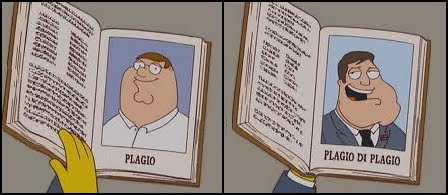

https://www.mayoclinic.org/es-es/diseases-conditions/nicotine-dependence/symptoms-causes/syc-20351584

# Regresión lineal

In [ ]:
modelo1<-lm(cervezas ~ educacion, data=consumo)
modelo1
summary(modelo1)


Call:
lm(formula = cervezas ~ educacion, data = consumo)

Coefficients:
(Intercept)    educacion  
     5.2914      -0.1958  



Call:
lm(formula = cervezas ~ educacion, data = consumo)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3335 -1.1588 -0.1588  0.8412  8.8623 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.29141    0.25754   20.55   <2e-16 ***
educacion   -0.19579    0.01899  -10.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.726 on 1138 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.0854,	Adjusted R-squared:  0.0846 
F-statistic: 106.3 on 1 and 1138 DF,  p-value: < 2.2e-16


In [ ]:
modelo2<-lm(cervezas ~ sexo, data=consumo)
modelo2
summary(modelo2)


Call:
lm(formula = cervezas ~ sexo, data = consumo)

Coefficients:
  (Intercept)  sexoMasculino  
       2.7746        -0.1938  



Call:
lm(formula = cervezas ~ sexo, data = consumo)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7746 -1.5808 -0.5808  0.4192  9.2254 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.77465    0.07129  38.922   <2e-16 ***
sexoMasculino -0.19381    0.10754  -1.802   0.0718 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.802 on 1138 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.002846,	Adjusted R-squared:  0.00197 
F-statistic: 3.248 on 1 and 1138 DF,  p-value: 0.07176


In [ ]:
modelo3<-lm(cervezas ~ edad, data=consumo)
modelo3
summary(modelo3)


Call:
lm(formula = cervezas ~ edad, data = consumo)

Coefficients:
(Intercept)         edad  
   2.609544     0.002021  



Call:
lm(formula = cervezas ~ edad, data = consumo)

Residuals:
   Min     1Q Median     3Q    Max 
-2.721 -1.655 -0.654  0.344  9.324 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.609544   0.162542  16.055   <2e-16 ***
edad        0.002021   0.003882   0.521    0.603    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.804 on 1138 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.0002382,	Adjusted R-squared:  -0.0006403 
F-statistic: 0.2711 on 1 and 1138 DF,  p-value: 0.6027


In [ ]:
modelo4<-lm(cervezas ~ hijos, data=consumo)
modelo4
summary(modelo4)


Call:
lm(formula = cervezas ~ hijos, data = consumo)

Coefficients:
(Intercept)        hijos  
    2.54341      0.09586  



Call:
lm(formula = cervezas ~ hijos, data = consumo)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9269 -1.5434 -0.5434  0.4566  9.2649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.54341    0.08025  31.694   <2e-16 ***
hijos        0.09586    0.03937   2.435    0.015 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.8 on 1138 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.005183,	Adjusted R-squared:  0.004309 
F-statistic: 5.929 on 1 and 1138 DF,  p-value: 0.01505


# Regresión lineal múltiple

In [ ]:
modelo5<-lm(cervezas~sexo+educacion+edad+hijos, data=consumo)
modelo5


Call:
lm(formula = cervezas ~ sexo + educacion + edad + hijos, data = consumo)

Coefficients:
  (Intercept)  sexoMasculino      educacion           edad          hijos  
     5.694254      -0.185692      -0.201045      -0.006702       0.008952  


In [ ]:
summary(modelo5)


Call:
lm(formula = cervezas ~ sexo + educacion + edad + hijos, data = consumo)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1385 -1.1125 -0.1885  0.8659  8.7205 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.694254   0.335583  16.968   <2e-16 ***
sexoMasculino -0.185692   0.104726  -1.773   0.0765 .  
educacion     -0.201045   0.019776 -10.166   <2e-16 ***
edad          -0.006702   0.004233  -1.583   0.1137    
hijos          0.008952   0.044455   0.201   0.8404    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.724 on 1135 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.09011,	Adjusted R-squared:  0.08691 
F-statistic:  28.1 on 4 and 1135 DF,  p-value: < 2.2e-16


# Modelos LIN LOG

In [ ]:
install.packages("readr")
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
datos<-read.csv("/content/consumo_cc.csv")
datos<-na.omit(datos)
head(datos)

,id,educacion,sexo,edad,cervezas,hijos,cigarrillo
,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>
1,1,12,Masculino,18,3,0,0
2,2,12,Femenino,19,2,0,1
3,3,10,Masculino,20,5,0,1
4,4,11,Masculino,20,4,0,0
5,5,12,Femenino,20,3,1,0
6,6,12,Femenino,20,4,1,0


In [ ]:
datos<-na.omit(datos)
datos$sexo=as.factor(datos$sexo)
datos$cervezas=as.integer(datos$cervezas)
head(datos)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,id,educacion,sexo,edad,cervezas,hijos,cigarrillo
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,1,12,Masculino,18,3,0,0
2,2,12,Femenino,19,2,0,1
3,3,10,Masculino,20,5,0,1
4,4,11,Masculino,20,4,0,0
5,5,12,Femenino,20,3,1,0
6,6,12,Femenino,20,4,1,0


Le quito las binarias como cigarrillo y sexo, también la inútil que es id

In [ ]:
reg3<-lm(cervezas~.-id -cigarrillo-sexo, data=datos)
summary(reg3)


Call:
lm(formula = cervezas ~ . - id - cigarrillo - sexo, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2276 -1.1216 -0.2101  0.8385  8.7966 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.584054   0.330089  16.917   <2e-16 ***
educacion   -0.199828   0.019782 -10.101   <2e-16 ***
edad        -0.006933   0.004235  -1.637    0.102    
hijos        0.023097   0.043775   0.528    0.598    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.725 on 1136 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.08759,	Adjusted R-squared:  0.08518 
F-statistic: 36.35 on 3 and 1136 DF,  p-value: < 2.2e-16


In [ ]:
datos$log_cer<-log(datos$cervezas)
datos$log_edu<-log(datos$educacion)
datos$log_edad<-log(datos$edad)
datos$log_hij<-log(datos$hijos)
datos<-na.omit(datos)
head(datos)

,id,educacion,sexo,edad,cervezas,hijos,cigarrillo,log_cer,log_edu,log_edad,log_hij
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12,Masculino,18,3,0,0,1.0986123,2.484907,2.890372,-Inf
2,2,12,Femenino,19,2,0,1,0.6931472,2.484907,2.944439,-Inf
3,3,10,Masculino,20,5,0,1,1.6094379,2.302585,2.995732,-Inf
4,4,11,Masculino,20,4,0,0,1.3862944,2.397895,2.995732,-Inf
5,5,12,Femenino,20,3,1,0,1.0986123,2.484907,2.995732,0
6,6,12,Femenino,20,4,1,0,1.3862944,2.484907,2.995732,0


In [ ]:
reg4<-lm(log_cer ~ log_edu+log_edad+log_hij, data=datos)
summary(reg4)

reg4<-lm(log_ven~log_pub+log_pre, data=vpp)
summary(reg4)

ERROR: ignored

Debido a que variante hijos mucha gente no tiene hijos hace que este método de logaritmos se descarte, si elimino a estas personas de la muestra inteferiía con mis demás respuestas además de que no sería algo estadísticamente representativo.

# Regresión logística binaria

In [ ]:
rlog1<-glm(cigarrillo ~ .-id, data=consumo, family="binomial")
summary(rlog1)


Call:
glm(formula = cigarrillo ~ . - id, family = "binomial", data = consumo)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2026  -0.9291  -0.6722   1.0999   2.0346  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.152876   0.502085  -8.271  < 2e-16 ***
educacion      0.088341   0.026408   3.345 0.000822 ***
sexoMasculino  0.627597   0.132932   4.721 2.34e-06 ***
edad           0.060432   0.005893  10.255  < 2e-16 ***
cervezas       0.004828   0.039001   0.124 0.901472    
hijos         -0.066994   0.057261  -1.170 0.242008    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1543.7  on 1139  degrees of freedom
Residual deviance: 1382.5  on 1134  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 1394.5

Number of Fisher Scoring iterations: 4


Ahora quitando las variables que según la prueba de Wald no aportan un valor significante (aquellas que no tienen estrellitas/asteriscos) en el aparte Pr(>|z|) del paso anterior, se puede notar que las variables que aportan son educación, sexo y edad (igualmente por tener estrellitas en la prueba de Wald).

In [ ]:
rlog2<-glm(cigarrillo ~ educacion+sexo+edad, data=consumo, family="binomial")
summary(rlog2)


Call:
glm(formula = cigarrillo ~ educacion + sexo + edad, family = "binomial", 
    data = consumo)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1548  -0.9170  -0.6599   1.1004   2.0739  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.252132   0.446278  -9.528  < 2e-16 ***
educacion      0.093680   0.024593   3.809 0.000139 ***
sexoMasculino  0.682171   0.130654   5.221 1.78e-07 ***
edad           0.057965   0.005218  11.109  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1558.5  on 1151  degrees of freedom
Residual deviance: 1391.9  on 1148  degrees of freedom
AIC: 1399.9

Number of Fisher Scoring iterations: 4


In [ ]:
rlog2


Call:  glm(formula = cigarrillo ~ educacion + sexo + edad, family = "binomial", 
    data = consumo)

Coefficients:
  (Intercept)      educacion  sexoMasculino           edad  
     -4.25213        0.09368        0.68217        0.05797  

Degrees of Freedom: 1151 Total (i.e. Null);  1148 Residual
Null Deviance:	    1559 
Residual Deviance: 1392 	AIC: 1400

Ahora toca saber si el modelo hecho anteriormente está correctamente especificado a través de la prueba de significancia global omnibus que es una tipo Chi cuadrado

In [ ]:
#prueba de significancia global H0: ¿modelo (in)correctamente especificado?
anova(rlog2, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,1151,1558.515,NA
educacion,1,2.034573,1150,1556.480,1.537574e-01
sexo,1,19.736171,1149,1536.744,8.890266e-06
edad,1,144.876083,1148,1391.868,2.285874e-33


Ahora la bondad de ajuste que no es un porcentaje por pseudo R cuadrados, entre más cercanos a 1 mejor

In [ ]:
PseudoR2(rlog2,which="McFadden")
PseudoR2(rlog2,which="Nagelkerke")

McFadden 
0.1069267

Nagelkerke 
  0.181634

Para pseudo R cuadrados me quedo con el número más grande que es en este caso Nagelkerke y ahora pasamos a las matrices para poder hacer la predicción transformándolos a factores

In [ ]:
consumo$rp<-predict(rlog2,type="response")
consumo$rtipo<-as.numeric(consumo$rp>0.5)

consumo$rp<-as.factor(consumo$rp)
consumo$rtipo<-as.factor(consumo$rtipo)
#otra columna que contraste rp y rtipo
t1<-table(consumo$cigarrillo,consumo$rtipo)
head(consumo)
t1
prop.table(t1,2)
prop.table(t1,2)*100

,id,educacion,sexo,edad,cervezas,hijos,cigarrillo,rp,rtipo
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,1,12,Masculino,18,3,0,0,0.197432080389105,0
2,2,12,Femenino,19,2,0,1,0.116435458604318,0
3,3,10,Masculino,20,5,0,1,0.186357790447152,0
4,4,11,Masculino,20,4,0,0,0.200981402531191,0
5,5,12,Femenino,20,3,1,0,0.122532674698305,0
6,6,12,Femenino,20,4,1,0,0.122532674698305,0


   
      0   1
  0 561 120
  1 225 246

   
            0         1
  0 0.7137405 0.3278689
  1 0.2862595 0.6721311

   
           0        1
  0 71.37405 32.78689
  1 28.62595 67.21311

Finalmente con esto obtenemos la matriz de confusión de t1 en porcentajes